In [1]:
!pip install plotly

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
sp = pd.read_csv("SRC_projects/Speed Dating Data.csv", encoding= "unicode_escape") #encoding= "unicode_escape" nous permet ici de lire le dataset, l'encodage par défaut est UTF-8

print("total of rows: {}".format(sp.shape[0]))
print("total of columns: {}".format(sp.shape[1]))
print("Percentage of missing values by column: ")
(sp.isnull().sum()*100)/sp.shape[0]

total of rows: 8378
total of columns: 195
Percentage of missing values by column: 


iid          0.000000
id           0.011936
gender       0.000000
idg          0.000000
condtn       0.000000
              ...    
attr5_3     75.936978
sinc5_3     75.936978
intel5_3    75.936978
fun5_3      75.936978
amb5_3      75.936978
Length: 195, dtype: float64

In [4]:
sp.describe()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
count,8378.000000,8377.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,6532.000000,8378.000000,...,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000
mean,283.675937,8.960248,0.500597,17.327166,1.828837,11.350919,16.872046,9.042731,9.295775,8.927668,...,7.240312,8.093357,8.388777,7.658782,7.391545,6.810020,7.615079,7.932540,7.155258,7.048611
std,158.583367,5.491329,0.500029,10.940735,0.376673,5.995903,4.358458,5.514939,5.650199,5.477009,...,1.576596,1.610309,1.459094,1.744670,1.961417,1.507341,1.504551,1.340868,1.672787,1.717988
min,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,...,2.000000,2.000000,3.000000,2.000000,1.000000,2.000000,2.000000,4.000000,1.000000,1.000000
25%,154.000000,4.000000,0.000000,8.000000,2.000000,7.000000,14.000000,4.000000,4.000000,4.000000,...,7.000000,7.000000,8.000000,7.000000,6.000000,6.000000,7.000000,7.000000,6.000000,6.000000
50%,281.000000,8.000000,1.000000,16.000000,2.000000,11.000000,18.000000,8.000000,9.000000,8.000000,...,7.000000,8.000000,8.000000,8.000000,8.000000,7.000000,8.000000,8.000000,7.000000,7.000000
75%,407.000000,13.000000,1.000000,26.000000,2.000000,15.000000,20.000000,13.000000,14.000000,13.000000,...,8.000000,9.000000,9.000000,9.000000,9.000000,8.000000,9.000000,9.000000,8.000000,8.000000
max,552.000000,22.000000,1.000000,44.000000,2.000000,21.000000,22.000000,22.000000,22.000000,22.000000,...,12.000000,12.000000,12.000000,12.000000,12.000000,10.000000,10.000000,10.000000,10.000000,10.000000


# Nettoyage des données

In [5]:
missing_values = sp.isnull().sum()*100/sp.shape[0]

drop_liste = []
for key, value in missing_values.iteritems():
    if value > 30.0:
        drop_liste.append(key)

drop_liste #nous allons supprimer ces colonnes qui ne nous serviriont pas pour notre analyse
# toutes les colonnes possédant plus de 30% de valeurs manquantes sont supprimées

sp = sp.drop(drop_liste, axis=1)

In [6]:
# Après avoir fait un premier tour des colonnes, j'ai listé les colonnes que je souhaite déjà supprimer, car elles ne me seront pas utiles pour mon analyse.
columns_to_drop = [
    "positin1",
    "field_cd",
    "zipcode",
    "career_c"
] #elles sont soit déja représenté par une autre colonne, soit inutile selon moi pour la future analyse
sp = sp.drop(columns_to_drop, axis=1)

In [7]:
sp.columns = sp.columns.map(lambda x: x.capitalize()) # je rajoute une majuscule sur chaque nom de colonne

#les colonnes inutiles supprimées, je décide de couper mon dataset et de procéder à un nettoyage:
#renommer les colonnes pour plus de clarté
#remplacer certaines valeurs numériques par leur réelle signification
#nettoyage des 62 premières colonne
sp = sp.rename(columns={     
    "Condtn":"Condition",
    "Pid":"Partner iid",
    "Int_corr":"Correlation of interests",
    "Age_o":"Partner age",
    "Race_o":"Partner race",
    "Dec_o": "Partner decision",
}) 

sp["Gender"] = sp["Gender"].replace({0:"Female", 1:"Male"})
sp["Condition"] = sp["Condition"].replace({1:"limited choice", 2:"extensive choice"})
sp['Match'] = sp['Match'].replace({0:"no", 1:"yes"}) # colonne match
sp["Samerace"] = sp["Samerace"].replace({0:"no", 1:"yes"}) #samerace
sp["Partner decision"] = sp["Partner decision"].replace({0:"no", 1:"yes"})
sp["Dec"] = sp["Dec"].replace({0:"no",1:"yes"})

In [8]:
sp['Partner race'] = sp['Partner race'].replace({1:"Black/African American",
                                                 2:"European/Caucasian-American",
                                                 3:"Latino/Hispanic American",
                                                 4:"Asian/Pacific Islander/Asian-American",
                                                 5:"Native American",
                                                 6:"Other"})


sp['Race'] = sp['Race'].replace({1:"Black/African American",
                                 2:"European/Caucasian-American",
                                 3:"Latino/Hispanic American",
                                 4:"Asian/Pacific Islander/Asian-American",
                                 5:"Native American",
                                 6:"Other"})

sp["Goal"] = sp["Goal"].replace({1:"Seemed like a fun night out",
                                 2:"To meet new people",
                                 3:"To get a date",
                                 4:"Looking for a serious relationship",
                                 5:"To say I did it",
                                 6:"Other"}) 

sp["Date"] = sp["Date"].replace({1:"Several times a week",
                                2:"Twice a week",
                                3:"Once a week",
                                4:"Twice a month",
                                5:"Once a month",
                                6:"Several times a year",
                                7:"Almost never"})

sp["Go_out"] = sp["Go_out"].replace({1:"Several times a week",
                                2:"Twice a week",
                                3:"Once a week",
                                4:"Twice a month",
                                5:"Once a month",
                                6:"Several times a year",
                                7:"Almost never"})
# pour plus de clarté, je remplace les valeurs numériques de ces colonnes par le sens selon la documentation

In [9]:
sp['Id'] = sp['Id'].astype("Int64")
sp["Partner iid"] = sp["Partner iid"].astype("Int64") 
#astype(int) ne fonctionne pas car nous avons des valeurs manquantes
 #"Int64" fonctionne
sp["Partner age"] = sp["Partner age"].astype("Int64")
sp['Age'] = sp['Age'].astype("Int64")
sp["Imprace"] = sp["Imprace"].astype("Int64")
sp["Imprelig"] = sp["Imprelig"].astype("Int64")

In [10]:
sp['Met_o'] = sp['Met_o'].replace({0:'no',1:'yes'})

# Analyse du dataset

In [11]:
sp.iloc[0:20, 0:20]

,Iid,Id,Gender,Idg,Condition,Wave,Round,Position,Order,Partner,Partner iid,Match,Correlation of interests,Samerace,Partner age,Partner race,Pf_o_att,Pf_o_sin,Pf_o_int,Pf_o_fun
0,1,1,Female,1,limited choice,1,10,7,4,1,11,no,0.14,no,27,European/Caucasian-American,35.00,20.00,20.00,20.00
1,1,1,Female,1,limited choice,1,10,7,3,2,12,no,0.54,no,22,European/Caucasian-American,60.00,0.00,0.00,40.00
2,1,1,Female,1,limited choice,1,10,7,10,3,13,yes,0.16,yes,22,Asian/Pacific Islander/Asian-American,19.00,18.00,19.00,18.00
3,1,1,Female,1,limited choice,1,10,7,5,4,14,yes,0.61,no,23,European/Caucasian-American,30.00,5.00,15.00,40.00
4,1,1,Female,1,limited choice,1,10,7,7,5,15,yes,0.21,no,24,Latino/Hispanic American,30.00,10.00,20.00,10.00
5,1,1,Female,1,limited choice,1,10,7,6,6,16,no,0.25,no,25,European/Caucasian-American,50.00,0.00,30.00,10.00
6,1,1,Female,1,limited choice,1,10,7,1,7,17,no,0.34,no,30,European/Caucasian-American,35.00,15.00,25.00,10.00
7,1,1,Female,1,limited choice,1,10,7,2,8,18,no,0.50,no,27,European/Caucasian-American,33.33,11.11,11.11,11.11
8,1,1,Female,1,limited choice,1,10,7,8,9,19,yes,0.28,no,28,European/Caucasian-American,50.00,0.00,25.00,10.00
9,1,1,Female,1,limited choice,1,10,7,9,10,20,no,-0.36,no,24,European/Caucasian-American,100.00,0.00,0.00,0.00


In [12]:
sp.iloc[0:20, 20:40]

,Pf_o_amb,Pf_o_sha,Partner decision,Attr_o,Sinc_o,Intel_o,Fun_o,Amb_o,Shar_o,Like_o,Prob_o,Met_o,Age,Field,Race,Imprace,Imprelig,From,Goal,Date
0,0.00,5.00,no,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21,Law,Asian/Pacific Islander/Asian-American,2,4,Chicago,To meet new people,Almost never
1,0.00,0.00,no,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21,Law,Asian/Pacific Islander/Asian-American,2,4,Chicago,To meet new people,Almost never
2,14.00,12.00,yes,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,yes,21,Law,Asian/Pacific Islander/Asian-American,2,4,Chicago,To meet new people,Almost never
3,5.00,5.00,yes,7.0,8.0,9.0,8.0,9.0,8.0,7.0,7.0,2.0,21,Law,Asian/Pacific Islander/Asian-American,2,4,Chicago,To meet new people,Almost never
4,10.00,20.00,yes,8.0,7.0,9.0,6.0,9.0,7.0,8.0,6.0,2.0,21,Law,Asian/Pacific Islander/Asian-American,2,4,Chicago,To meet new people,Almost never
5,0.00,10.00,yes,7.0,7.0,8.0,8.0,7.0,7.0,7.0,6.0,2.0,21,Law,Asian/Pacific Islander/Asian-American,2,4,Chicago,To meet new people,Almost never
6,5.00,10.00,no,3.0,6.0,7.0,5.0,8.0,7.0,2.0,1.0,2.0,21,Law,Asian/Pacific Islander/Asian-American,2,4,Chicago,To meet new people,Almost never
7,11.11,22.22,no,6.0,7.0,5.0,6.0,8.0,6.0,7.0,5.0,2.0,21,Law,Asian/Pacific Islander/Asian-American,2,4,Chicago,To meet new people,Almost never
8,0.00,15.00,yes,7.0,7.0,8.0,8.0,8.0,9.0,6.5,8.0,2.0,21,Law,Asian/Pacific Islander/Asian-American,2,4,Chicago,To meet new people,Almost never
9,0.00,0.00,no,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,2.0,21,Law,Asian/Pacific Islander/Asian-American,2,4,Chicago,To meet new people,Almost never


In [13]:
print(f"Nombre de sujets au total: {sp['Iid'].max()}")
print(f"nombre de vagues: {sp['Wave'].max()}")

Nombre de sujets au total: 552
nombre de vagues: 21


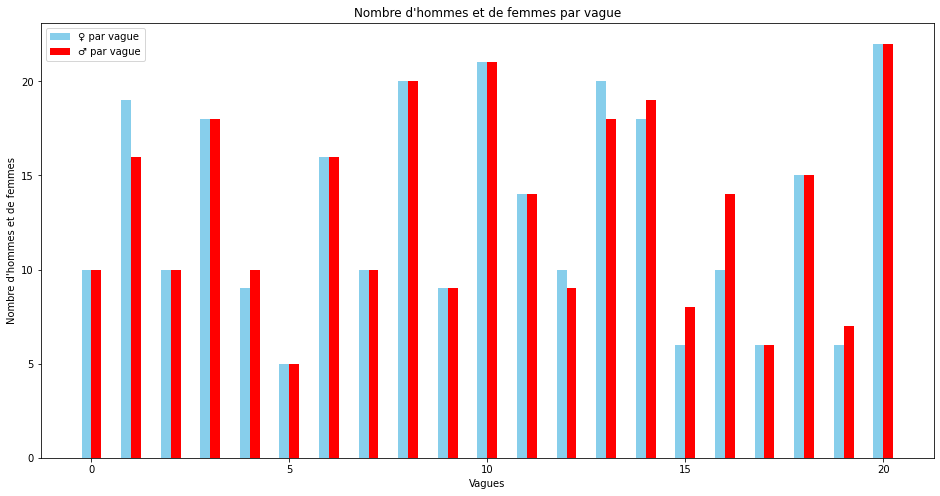

In [14]:
nbre_femmes_per_vague = sp[sp['Gender'] == 'Female'].groupby('Wave')['Id'].nunique()
nbre_femmes_per_vague

nbre_hommes_per_vague = sp[sp['Gender'] == 'Male'].groupby('Wave')['Id'].nunique()

plt.figure(figsize=(16,8))
ind = np.arange(len(nbre_femmes_per_vague))
width = 0.25
plt.bar(ind - width/2, nbre_femmes_per_vague.values, width, color='SkyBlue', label='♀ par vague')
plt.bar(ind + width/2, nbre_hommes_per_vague.values, width, color='Red', label='♂ par vague')

plt.ylabel("Nombre d'hommes et de femmes")
plt.xlabel("Vagues")
plt.title("Nombre d'hommes et de femmes par vague")
plt.legend()

Text(0.5, 1.0, "Moyenne d'age du partenaire par genre")

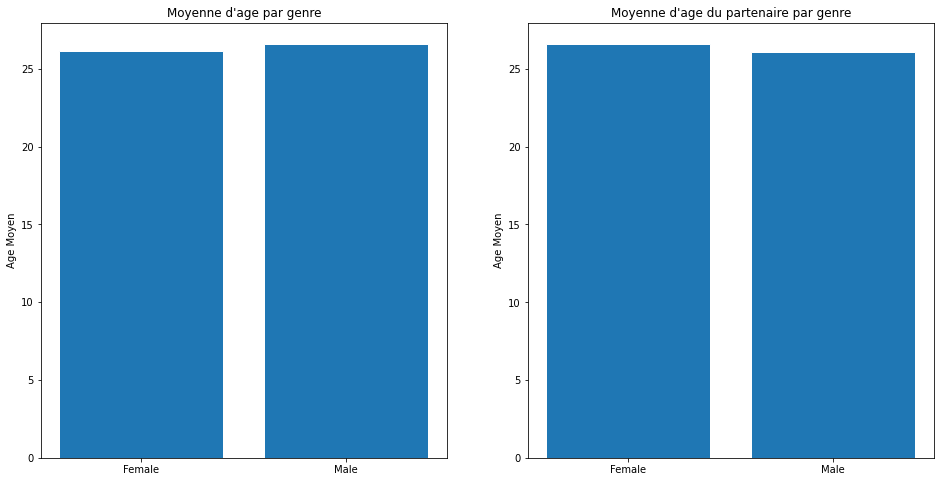

In [15]:
moyenne_age_par_genre = sp.groupby('Gender')['Age'].mean()
moyenne_partner_age_par_genre = sp.groupby('Gender')['Partner age'].mean() #On observe que la moyenne d'age est la meme pour les deux sexes.

plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.bar(moyenne_age_par_genre.index, moyenne_age_par_genre.values, edgecolor='white')
plt.ylabel("Age Moyen")
plt.title("Moyenne d'age par genre")

plt.subplot(1,2,2)
plt.bar(moyenne_partner_age_par_genre.index, moyenne_partner_age_par_genre.values, edgecolor='white')
plt.ylabel("Age Moyen")
plt.title("Moyenne d'age du partenaire par genre")

In [16]:
nbre_matchs_positifs_per_wave = sp[sp['Match']=='yes'].groupby('Wave')['Match'].value_counts()
nbre_matchs_positifs_per_wave
nbre_matchs_negatifs_per_wave = sp[sp['Match']=='no'].groupby('Wave')['Match'].value_counts()

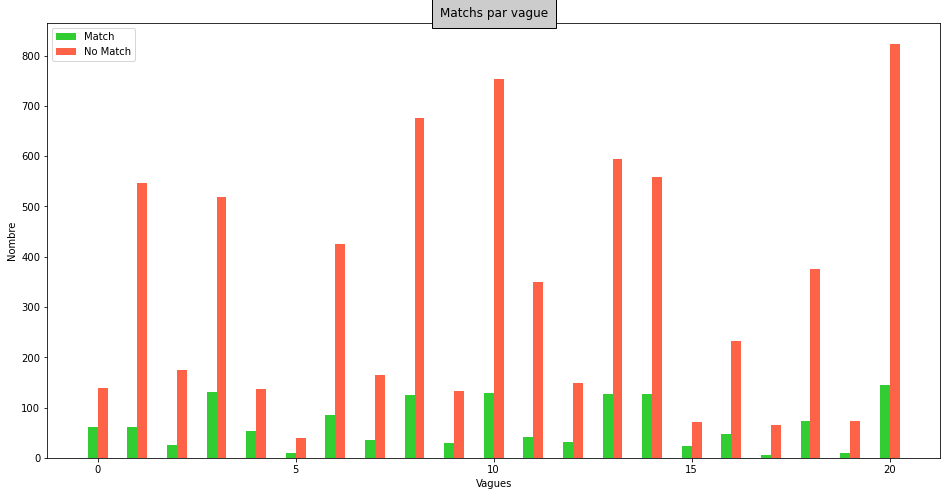

In [17]:
plt.figure(figsize=(16,8))
ind = np.arange(len(nbre_matchs_positifs_per_wave))
width = 0.25
plt.bar(ind - width/2, nbre_matchs_positifs_per_wave.values, width, color='limegreen', label='Match')
plt.bar(ind + width/2, nbre_matchs_negatifs_per_wave.values, width, color='tomato', label='No Match')

plt.ylabel("Nombre")
plt.xlabel("Vagues")
plt.title("Matchs par vague", bbox={'facecolor':'0.8', 'pad':8})
plt.legend()

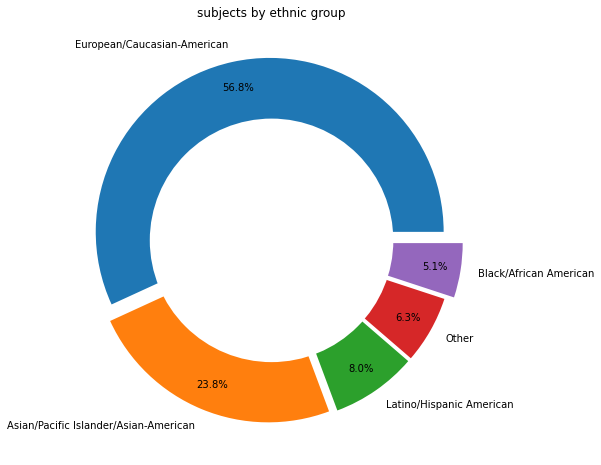

In [18]:
races = list((sp['Race'].value_counts() *100 / sp.shape[0]).index)
races_perc = list((sp['Race'].value_counts() *100 / sp.shape[0]).values)

explode = (0.05,0.05,0.05,0.05,0.1)

plt.figure(figsize=(8,8))
plt.pie(races_perc, labels=races, autopct='%1.1f%%', pctdistance=0.85, explode=explode)

centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()

fig.gca().add_artist(centre_circle)

plt.title("subjects by ethnic group")

plt.show()

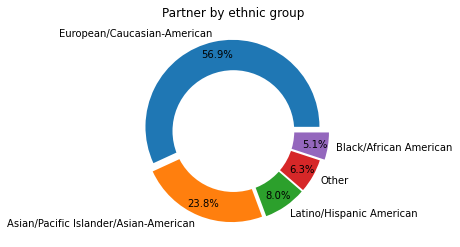

In [19]:
races = list((sp['Partner race'].value_counts() *100 / sp.shape[0]).index)
races_perc = list((sp['Partner race'].value_counts() *100 / sp.shape[0]).values)

explode = (0.05,0.05,0.05,0.05,0.1)

plt.pie(races_perc, labels=races, autopct='%1.1f%%', pctdistance=0.85, explode=explode)

centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()

fig.gca().add_artist(centre_circle)

plt.title("Partner by ethnic group")

plt.show()

In [20]:
goals = sp['Goal'].value_counts()*100 / sp.shape[0]
date = sp['Date'].value_counts()*100 / sp.shape[0]
go_out = sp['Go_out'].value_counts()*100 / sp.shape[0]

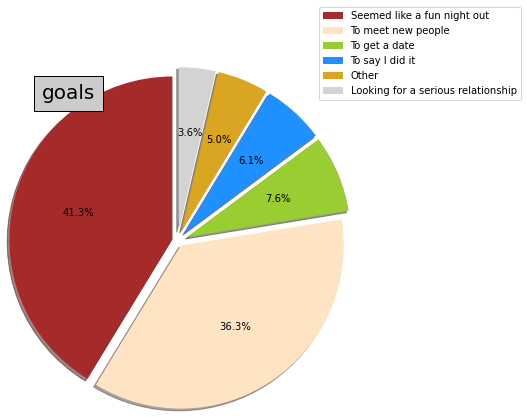

In [21]:
goals_color = ["brown","bisque","yellowgreen","dodgerblue","goldenrod","lightgrey"]
plt.figure(figsize=(5,5))
plt.pie(goals,
        colors=goals_color,
        explode = [0.05,0.05,0.1,0.1,0.1,0.1],
        autopct='%1.1f%%',
       shadow=True,
       startangle=90,
       radius=1.5)
plt.legend(goals.index, bbox_to_anchor=(1,1))
plt.title('goals', loc='left', fontsize=20,bbox={'facecolor':'0.8', 'pad':8})
plt.show()
#title = goals

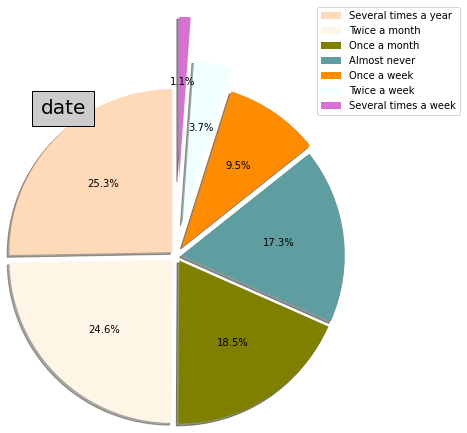

In [22]:
date_colors = ["peachpuff","oldlace","olive","cadetblue","darkorange","azure","orchid"]
plt.figure(figsize=(5,5))
plt.pie(date,
        colors=date_colors,
        autopct='%1.1f%%',
        explode = [0.05,0.05,0.05,0.05,0.1,0.3,0.7],
       shadow=True,
       startangle=90,
       radius=1.5)
plt.legend(date.index, bbox_to_anchor=(1,1))
plt.title('date', loc='left', fontsize=20,bbox={'facecolor':'0.8', 'pad':8})
plt.show()

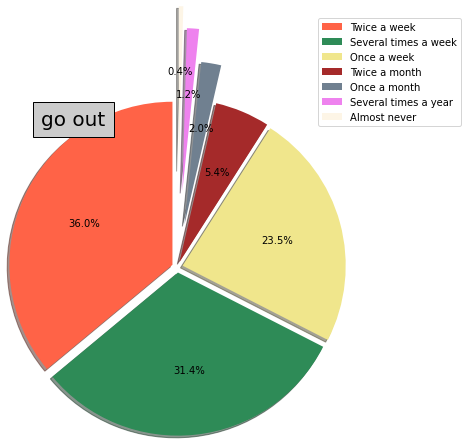

In [23]:
go_out_colors = ["tomato","seagreen","khaki","brown","slategrey", "violet" ,"oldlace"]
plt.figure(figsize=(5,5))
plt.pie(go_out,
        colors=go_out_colors,
        autopct='%1.1f%%',
        explode = [0.05,0.05,0.05,0.05,0.4,0.7,0.9],
       shadow=True,
       startangle=90,
       radius=1.5)
plt.legend(go_out.index, bbox_to_anchor=(1,1))
plt.title('go out', loc='left', fontsize=20, bbox={'facecolor':'0.8', 'pad':8})
plt.show()

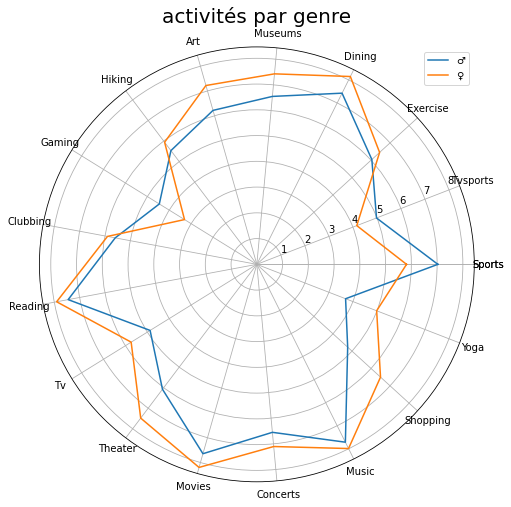

In [24]:
activities = list(sp.loc[:,"Sports":"Yoga"].columns)

man_activities = []
for x in activities:
    man_activities.append(sp[sp['Gender']=="Male"][x].mean())

woman_activities = []
for x in activities:
    woman_activities.append(sp[sp['Gender']=="Female"][x].mean())
    
label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(man_activities), endpoint=False)
label_loc= np.concatenate((label_loc, [label_loc[0]]))

activities.append(activities[0])
man_activities.append(man_activities[0])
woman_activities.append(woman_activities[0])

plt.figure(figsize=(8,8))
plt.subplot(polar=True)
plt.plot(label_loc, man_activities, label='♂')
plt.plot(label_loc, woman_activities, label='♀')
plt.title('activités par genre', size=20)
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=activities)
plt.legend()
plt.show()

In [25]:
hommes = sp[sp['Gender']=='Male']
femmes = sp[sp['Gender']=='Female']
match = sp[sp['Match']=='yes']

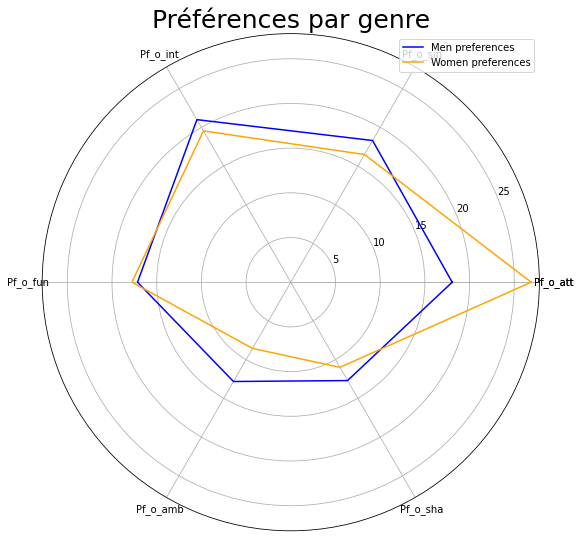

In [26]:
preferences = list(sp.loc[0:5, "Pf_o_att":"Pf_o_sha"].columns) #Pf sont les préférences attribués au temps 1

man_pref = []
for x in preferences:
    man_pref.append(hommes[x].mean())

woman_pref = []
for x in preferences:
    woman_pref.append(femmes[x].mean())

label_loc2 = np.linspace(0, 2*np.pi, num=len(preferences), endpoint=False)
label_loc2 = np.concatenate((label_loc2,[label_loc2[0]]))

preferences.append(preferences[0])
man_pref.append(man_pref[0])
woman_pref.append(woman_pref[0])

plt.figure(figsize=(8,8))
plt.subplot(polar=True)
plt.plot(label_loc2, man_pref,label="Men preferences", color='b')

plt.plot(label_loc2, woman_pref, label="Women preferences", color='orange')   
plt.title('Préférences par genre', size=25)
line, labels = plt.thetagrids(label_loc2*180/np.pi , labels=preferences)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()                         

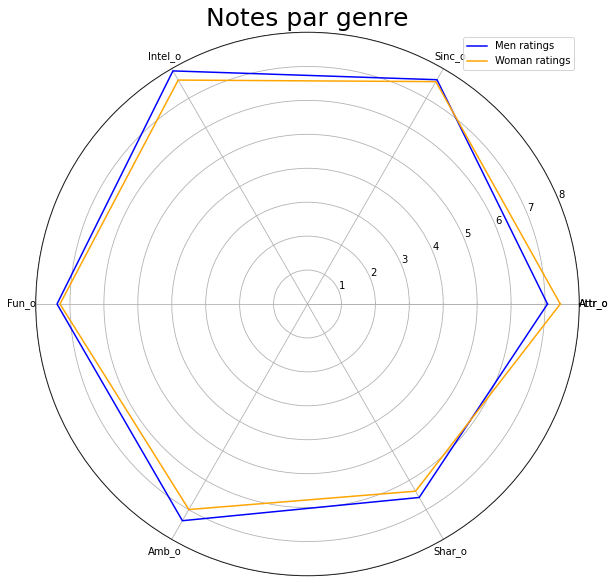

In [27]:
ratings = list(sp.loc[0:5,"Attr_o":"Shar_o"].columns)

man_ratings = []
for x in ratings:
    man_ratings.append(hommes[hommes['Partner decision']=='yes'][x].mean())
woman_ratings = []
for x in ratings:
    woman_ratings.append(femmes[femmes['Partner decision']=='yes'][x].mean())

label_loc = np.linspace(0, 2*np.pi, num=len(ratings), endpoint=False)
label_loc = np.concatenate((label_loc, [label_loc[0]]))

ratings.append(ratings[0])
man_ratings.append(man_ratings[0])
woman_ratings.append(woman_ratings[0])

plt.figure(figsize=(10,10))
plt.subplot(polar=True)
plt.plot(label_loc, man_ratings, label="Men ratings", color='b')

plt.plot(label_loc,woman_ratings, label="Woman ratings", color='orange')
plt.title("Notes par genre", size=25)
line, labels = plt.thetagrids(label_loc*180/np.pi, labels=ratings)
plt.legend()
plt.grid(True)
plt.tight_layout
plt.show()

## Wave 6 - 9 / importance of thoses attributs

In [28]:
wave_6_9 = sp.loc[(sp['Wave']>=6) & (sp['Wave']<=9)]

wave_1_5 = sp.loc[(sp['Wave']>=1)&(sp['Wave']<=5)]

wave_10_21 = sp.loc[(sp['Wave']>=10)&(sp['Wave']<=21)]

wave_1_5_10_21 = wave_1_5.append(wave_10_21)

/tmp/ipykernel_8608/4128094933.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wave_1_5_10_21 = wave_1_5.append(wave_10_21)


### 1_1 What you look for in the opposite sex?

In [29]:
attributes = ["Attr1_1","Sinc1_1","Intel1_1","Fun1_1","Amb1_1","Shar1_1"]
attributes_for_pie = ["attirant(e)","sincère","intelligent(e)","drôle","ambition","interessant(e)"]

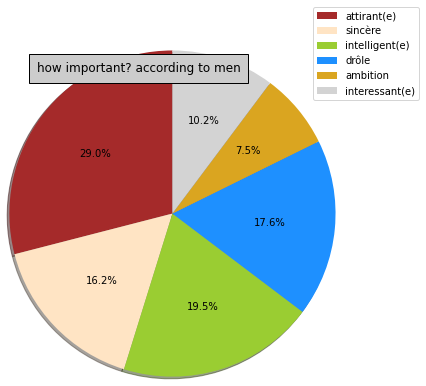

In [51]:
list_1_1 = []
for x in attributes:
    list_1_1.append(wave_1_5_10_21[wave_1_5_10_21['Gender']=="Male"][x].mean())
# selon ces chiffres, ce que cherchent les hommes avant tout chez une femme c'est sa beauté

plt.figure(figsize=(5,5))
plt.pie(list_1_1,
       autopct='%1.1f%%',
        colors=goals_color,
       shadow=True,
       startangle=90,
       radius=1.5)
plt.legend(attributes_for_pie, bbox_to_anchor=(1,0.9))
plt.title("how important? according to men", loc="left",bbox={'facecolor':'0.8', 'pad':8})
plt.show()

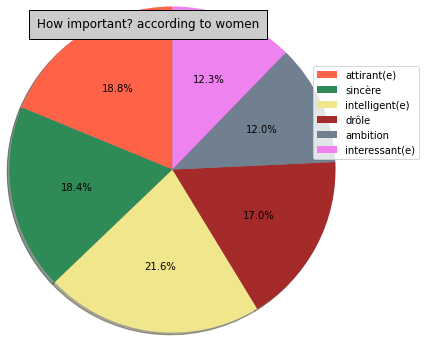

In [52]:
liste_1_1_woman = []
for x in attributes:
    liste_1_1_woman.append(wave_1_5_10_21[wave_1_5_10_21['Gender']=="Female"][x].mean())
# selon ces chiffres, ce que cherchent les femmes avant tout, c'est l'intelligence, suivi de la beauté et de la sincérité    

plt.figure(figsize=(10,5))
plt.pie(liste_1_1_woman,
       autopct='%1.1f%%',
        colors=go_out_colors,
       shadow=True,
       startangle=90,
       radius=1.5)
plt.legend(attributes_for_pie, bbox_to_anchor=(1,0.9))
plt.title('How important? according to women',loc="left",bbox={'facecolor':'0.8', 'pad':8})
plt.show()

#### 4_1 what you think the opposite sex look for? 

In [32]:
wave_6_9.iloc[0:5, 66:75]

,Attr4_1,Sinc4_1,Intel4_1,Fun4_1,Amb4_1,Shar4_1,Attr2_1,Sinc2_1,Intel2_1
1846,10.0,7.0,7.0,7.0,5.0,7.0,22.73,15.91,13.64
1847,10.0,7.0,7.0,7.0,5.0,7.0,22.73,15.91,13.64
1848,10.0,7.0,7.0,7.0,5.0,7.0,22.73,15.91,13.64
1849,10.0,7.0,7.0,7.0,5.0,7.0,22.73,15.91,13.64
1850,10.0,7.0,7.0,7.0,5.0,7.0,22.73,15.91,13.64


In [33]:
attributes_4_1 = ["Attr4_1","Sinc4_1","Intel4_1","Fun4_1","Amb4_1","Shar4_1"]
attributes_4_1_for_pie = ["attirant(e)","sincère","intelligent(e)","drôle","ambition","interessant(e)"]

In [34]:
liste_4_1_man = []
for x in attributes_4_1:
    liste_4_1_man.append(wave_6_9[wave_6_9['Gender']=="Male"][x].mean())

liste_4_1_woman = []
for x in attributes_4_1:
    liste_4_1_woman.append(wave_6_9[wave_6_9['Gender']=="Female"][x].mean())

liste_4_1_2_man = []
for x in attributes_4_1:
    liste_4_1_2_man.append(wave_1_5_10_21[wave_1_5_10_21['Gender']=="Male"][x].mean())
    
liste_4_1_2_woman = []
for x in attributes_4_1:
    liste_4_1_2_woman.append(wave_1_5_10_21[wave_1_5_10_21['Gender']=="Female"][x].mean())

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


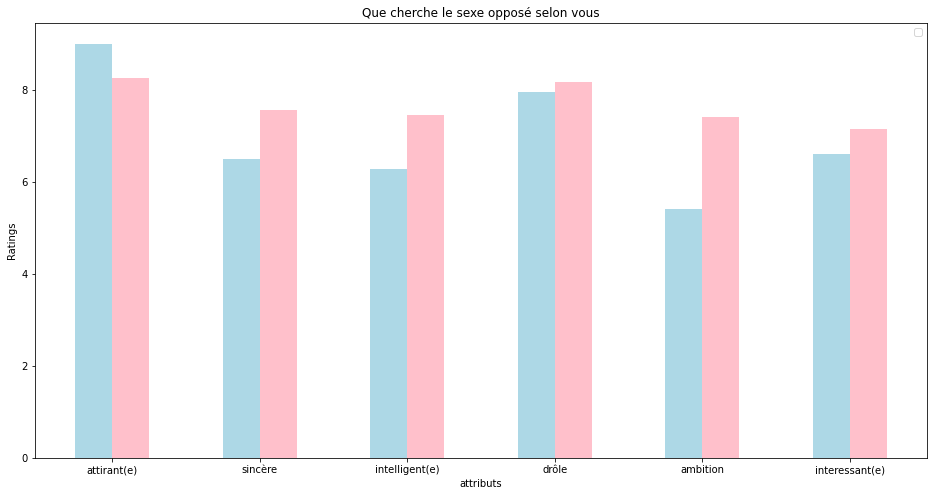

In [35]:
plt.figure(figsize=(16,8))
ind = np.arange(len(liste_4_1_man))
width = 0.25
plt.bar(ind - width/2, liste_4_1_man, width, color='lightblue')
plt.bar(ind + width/2, liste_4_1_woman, width, color='pink')

plt.ylabel("Ratings")
plt.xlabel("attributs")
plt.title("Que cherche le sexe opposé selon vous")
plt.xticks(range(0,len(liste_4_1_man)), attributes_for_pie)
plt.legend()


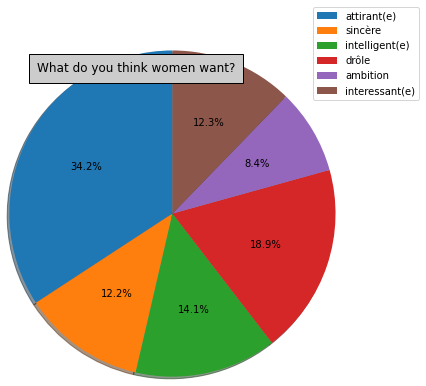

In [36]:
plt.figure(figsize=(10,5))
plt.pie(liste_4_1_2_man,
       autopct='%1.1f%%',
       shadow=True,
       startangle=90,
       radius=1.5)
plt.legend(attributes_for_pie, bbox_to_anchor=(1,0.9))
plt.title('What do you think women want?',loc="left",bbox={'facecolor':'0.8', 'pad':8})
plt.show()

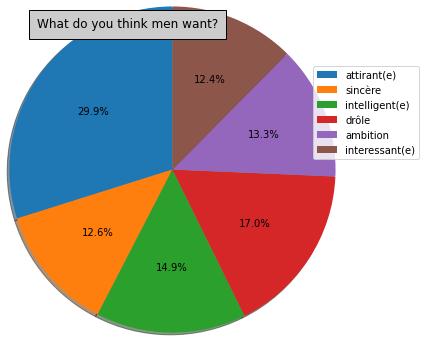

In [37]:
plt.figure(figsize=(10,5))
plt.pie(liste_4_1_2_woman,
       autopct='%1.1f%%',
       shadow=True,
       startangle=90,
       radius=1.5)
plt.legend(attributes_for_pie, bbox_to_anchor=(1,0.9))
plt.title('What do you think men want?',loc="left",bbox={'facecolor':'0.8', 'pad':8})
plt.show()

### 2_1 What do you think the opposite sex looks for in a date?

In [38]:
sp.iloc[0:5, 70:85]

,Amb4_1,Shar4_1,Attr2_1,Sinc2_1,Intel2_1,Fun2_1,Amb2_1,Shar2_1,Attr3_1,Sinc3_1,Fun3_1,Intel3_1,Amb3_1,Dec,Attr
0,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,yes,6.0
1,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,yes,7.0
2,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,yes,5.0
3,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,yes,7.0
4,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,yes,5.0
